**Authors:** Jozef Hanč, Martina Hančová  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [martina.hancova@upjs.sk](mailto:martina.hancova@upjs.sk)
***

# <font color = brown, size=6> Accuracy of $\mathcal{GDD}$ pdf calculations $-$ Wolfram Mathematica </font>
# Pdf convolution integral and analytic expression

<font size=4> Computational tools - CAS: </font>  **<font size=4>Wolfram Mathematica (MMA)</font>**  

In [1]:
# python libraries
import numpy as np
from numpy import inf as INF, array as v
import platform as pt
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from time import time
import math, cmath
import scipy
scipy.__version__, np.__version__

('1.6.0', '1.19.2')

## Python procedures and functions

In [2]:
# accuracy commands
def abs_errs(df1, df2):
    N = len(df1)
    errors = [abs(df1[i]-df2[i]) for i in range(N)]
    return errors

def accuracy(df1, df2):
    return max(abs_errs(df1,df2))

In [3]:
# pdf quadruple precision values
N = 4
dpari = {str(10**(n+1)):np.loadtxt('data/Pari_Sage_pdf'+str(10**(n+1))+'.txt', delimiter=',',
                                   dtype=np.longdouble) for n in range(N)}
dx = {str(10**(n+1)):np.loadtxt('data/xvalues'+str(10**(n+1))+'.txt', dtype=np.longdouble) for n in range(N)}

# Mathematica

## Convolution pdf integral `53 bit`

In [4]:
# Wolfram Cloud
from IPython.display import IFrame
result = 'https://www.wolframcloud.com/obj/hancjozef/Published/2.1_NumericalConv_53bit_MMA.nb'
IFrame(result, 900, 400)

In [5]:
dmc = pd.read_csv('data/WolframConv10000.txt')
dmc

,39.9767877
0,1.033792e-106
1,1.101412e-106
2,1.173455e-106
3,1.250209e-106
4,1.331983e-106
...,...
9995,4.680103e-03
9996,4.676427e-03
9997,4.672754e-03
9998,4.669084e-03


## Analytic expression pdf `MachinePrecision 53 bit`

In [6]:
result = 'https://www.wolframcloud.com/obj/hancjozef/Published/2.1_AnalyticPdf_53bit_MMA.nb'
IFrame(result, 900, 400)

In [7]:
dma = pd.read_csv('data/Wolfram53bit10000.txt')
dma

,2.1766195
0,1.033792e-106
1,1.101412e-106
2,1.173455e-106
3,1.250209e-106
4,1.331983e-106
...,...
9995,4.680103e-03
9996,4.676427e-03
9997,4.672754e-03
9998,4.669084e-03


## Analytic pdf expression `N[ ], 53 bit`

In [8]:
result = 'https://www.wolframcloud.com/obj/hancjozef/Published/2.1_AnalyticPdf_N_53bit_MMA.nb'
IFrame(result, 900, 400)

In [9]:
dmaN = pd.read_csv('data/WolframN10000.txt')
dmaN

,9.3884504
0,1.033792e-106
1,1.101412e-106
2,1.173455e-106
3,1.250209e-106
4,1.331983e-106
...,...
9995,4.680103e-03
9996,4.676427e-03
9997,4.672754e-03
9998,4.669084e-03


# Errors and graphs

In [10]:
# dataframes for MMA computations
dms = {'MMA-conv-53bit':dmc,'MMA-analytic-53bit':dma, 'MMA-analytic-N':dmaN}
methods = list(dms.keys())
methods

['MMA-conv-53bit', 'MMA-analytic-53bit', 'MMA-analytic-N']

In [11]:
benchmark = pd.DataFrame(columns = methods)
scn = lambda series, prec: [np.format_float_scientific(item, precision=prec) for item in v(series)]

In [12]:
# reference runtime for pdf 
tWpy = 3.7066538833333325/2 # times.loc['10000','W py']
tWpy

1.8533269416666662

In [13]:
for method, data in dms.items():
    benchmark.loc['approx. runtime', method] = data.columns[0]
    benchmark.loc['accuracy', method] = accuracy(data.values,dpari['10000'])
benchmark.loc['approx. acceleration', :] = benchmark.loc['approx. runtime', :].astype(float).apply(lambda x: tWpy/x).round(2)    
benchmark.loc['accuracy',:] = benchmark.loc['accuracy',:].apply(lambda x: scn(x,2)[0])

In [14]:
benchmark

,MMA-conv-53bit,MMA-analytic-53bit,MMA-analytic-N
approx. runtime,39.9767877,2.1766195,9.3884504
accuracy,4.53e-08,2.7e-02,5.33e-15
approx. acceleration,0.05,0.85,0.2


MMA-conv-53bit accuracy = 4.5341327137293774e-08


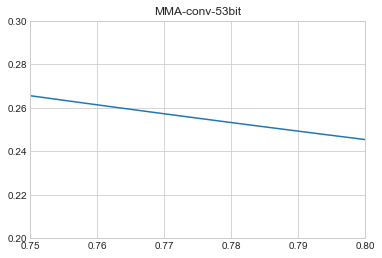

MMA-analytic-53bit accuracy = 0.026953019648149668


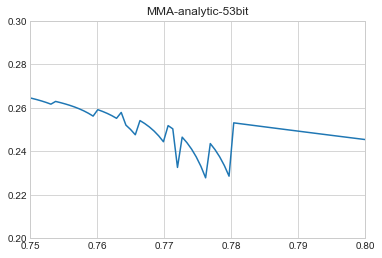

MMA-analytic-N accuracy = 5.329070518200751e-15


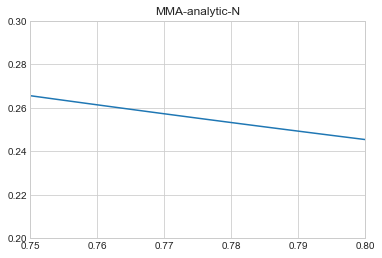

In [15]:
xh = dx['10000']
for method, data in dms.items():
    yh = [y for y in data.values.flatten()]
    print(method+' accuracy =', accuracy(dpari['10000'], yh))
    plt.plot(xh,yh)
    plt.title(method)
    plt.ylim(0.2,0.3)
    plt.xlim(0.75, 0.8)
    plt.show();

***
<a id=references></a>
# <font color=brown> References </font>
This notebook belongs to supplementary materials of the paper submitted to Journal of Statistical Computation and
Simulation and available at  <https://arxiv.org/abs/2105.04427>.
* Hančová, M., Gajdoš, A., Hanč, J. (2021). A practical, effective calculation of gamma difference distributions with open data science tools. arXiv:2105.04427 [cs, math, stat], https://arxiv.org/abs/2105.04427

### Abstract of the paper

At present, there is still no officially accepted and extensively verified implementation of computing the gamma difference distribution allowing unequal shape parameters. We explore four computational ways of the gamma difference distribution with the different shape parameters resulting from time series kriging, a forecasting approach based on the best linear unbiased prediction, and linear mixed models. The results of our numerical study, with emphasis on using open data science tools, demonstrate that our open tool implemented in high-performance Python(with Numba) is exponentially fast, highly accurate, and very reliable. It combines numerical inversion of the characteristic function and the trapezoidal rule with the double exponential oscillatory transformation (DE quadrature). At the double 53-bit precision, our tool outperformed the speed of the analytical computation based on Tricomi's $U(a, b, z)$ function in CAS software (commercial Mathematica, open SageMath) by 1.5-2 orders. At the precision of scientific numerical computational tools, it exceeded open SciPy, NumPy, and commercial MATLAB 5-10 times. The potential future application of our tool for a mixture of characteristic functions could open new possibilities for fast data analysis based on exact probability distributions in areas like multidimensional statistics, measurement uncertainty analysis in metrology as well as in financial mathematics and risk analysis. 